# Machine Learning 1

Our dataset is from Kaggle: **"Aviation Accident Database & Synopses"** by *Kheiralllah Samaha*\
Source: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses \
Description of data available at https://www.ntsb.gov/_layouts/15/ntsb.aviation/AviationDownloadDataDictionary.aspx

In this section, we perform our Machine Learning part 1. The following ML models from ```scikit-learn``` are used:

---

**Regression**
- Linear Regression

**Others**
- Standard Scaler

More details on these models at: https://scikit-learn.org/stable/

Import the essential library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set

<function seaborn.rcmod.set(*args, **kwargs)>

We will first extract the dataset and assign to a new dataset named **avi_clean** 

In [2]:
avi_clean=pd.read_csv('Cleaned Aviation Data.csv')
avi_clean

,Unnamed: 0,Accident.Number,Investigation.Type,Event Year,Location,Country,Injury.Severity,Aircraft.damage,Make,Amateur.Built,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Fatal.rate,Number of plane involved
0,0,SEA87LA080,Accident,1948,"MOOSE CREEK, ID",United States,Fatal,Destroyed,STINSON,No,...,Reciprocating,Personal,2,0,0,0,Unknown,4,100.00,1
1,1,LAX94LA336,Accident,1962,"BRIDGEPORT, CA",United States,Fatal,Destroyed,PIPER,No,...,Reciprocating,Personal,4,0,0,0,Unknown,0,100.00,1
2,2,NYC07LA005,Accident,1974,"Saltville, VA",United States,Fatal,Destroyed,CESSNA,No,...,Reciprocating,Personal,3,0,0,1,Instrument Meterological Conditions,4,75.00,1
3,3,LAX96LA321,Accident,1977,"EUREKA, CA",United States,Fatal,Destroyed,ROCKWELL,No,...,Reciprocating,Personal,2,0,0,0,Instrument Meterological Conditions,4,100.00,1
4,4,CHI79FA064,Accident,1979,"Canton, OH",United States,Fatal,Destroyed,CESSNA,No,...,Unknown,Personal,1,2,0,0,Visual Meteorological Conditions,3,33.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,87277,GAA22WA054,Accident,2021,"Auxerre, OF",United States,Fatal,Destroyed,CIRRUS DESIGN CORP,No,...,Unknown,Unknown,1,0,0,0,Unknown,0,100.00,1
87278,87278,WPR22LA069,Accident,2021,"Auburn, CA",United States,Non-Fatal,Unknown,CESSNA,No,...,Unknown,Positioning,0,0,1,0,Unknown,0,0.00,1
87279,87279,CEN22FA082,Accident,2021,"Hardy, AR",United States,Fatal,Unknown,CESSNA,No,...,Unknown,Personal,2,0,0,0,Unknown,0,100.00,1
87280,87280,ERA22LA097,Accident,2021,"Marathon, FL",United States,Non-Fatal,Unknown,CESSNA,No,...,Unknown,Unknown,0,3,0,0,Unknown,0,0.00,1


In [3]:
avi_clean.isnull().sum()

Unnamed: 0                  0
Accident.Number             0
Investigation.Type          0
Event Year                  0
Location                    0
Country                     0
Injury.Severity             0
Aircraft.damage             0
Make                        0
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Broad.phase.of.flight       0
Fatal.rate                  0
Number of plane involved    0
dtype: int64

In [4]:
avi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                87282 non-null  int64  
 1   Accident.Number           87282 non-null  object 
 2   Investigation.Type        87282 non-null  object 
 3   Event Year                87282 non-null  int64  
 4   Location                  87282 non-null  object 
 5   Country                   87282 non-null  object 
 6   Injury.Severity           87282 non-null  object 
 7   Aircraft.damage           87282 non-null  object 
 8   Make                      87282 non-null  object 
 9   Amateur.Built             87282 non-null  object 
 10  Number.of.Engines         87282 non-null  int64  
 11  Engine.Type               87282 non-null  object 
 12  Purpose.of.flight         87282 non-null  object 
 13  Total.Fatal.Injuries      87282 non-null  int64  
 14  Total.

## Multi-Variate Linear Regression (using the initial data)

We will first perform LinearRegression to find the relationship between the numeric response variable (Fatality Rate) and the numeric predictors (Number of planes, Number of engines)

Response Variable : **Fatal.rate**\
Predictors (numeric) : **Number of plane involved, Number.of.Engines**

We will be doing the standard least squares Linear Regression.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
y = pd.DataFrame(avi_clean["Fatal.rate"])
X = pd.DataFrame(avi_clean[["Number.of.Engines", "Number of plane involved"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #split the data into train:test=8:2

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

Intercept of Regression 	: b =  [11.02304878]
Coefficients of Regression 	: a =  [[1.7878362  3.90685389]]



In [7]:
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

                 Predictors  Coefficients
0         Number.of.Engines      1.787836
1  Number of plane involved      3.906854



In [8]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

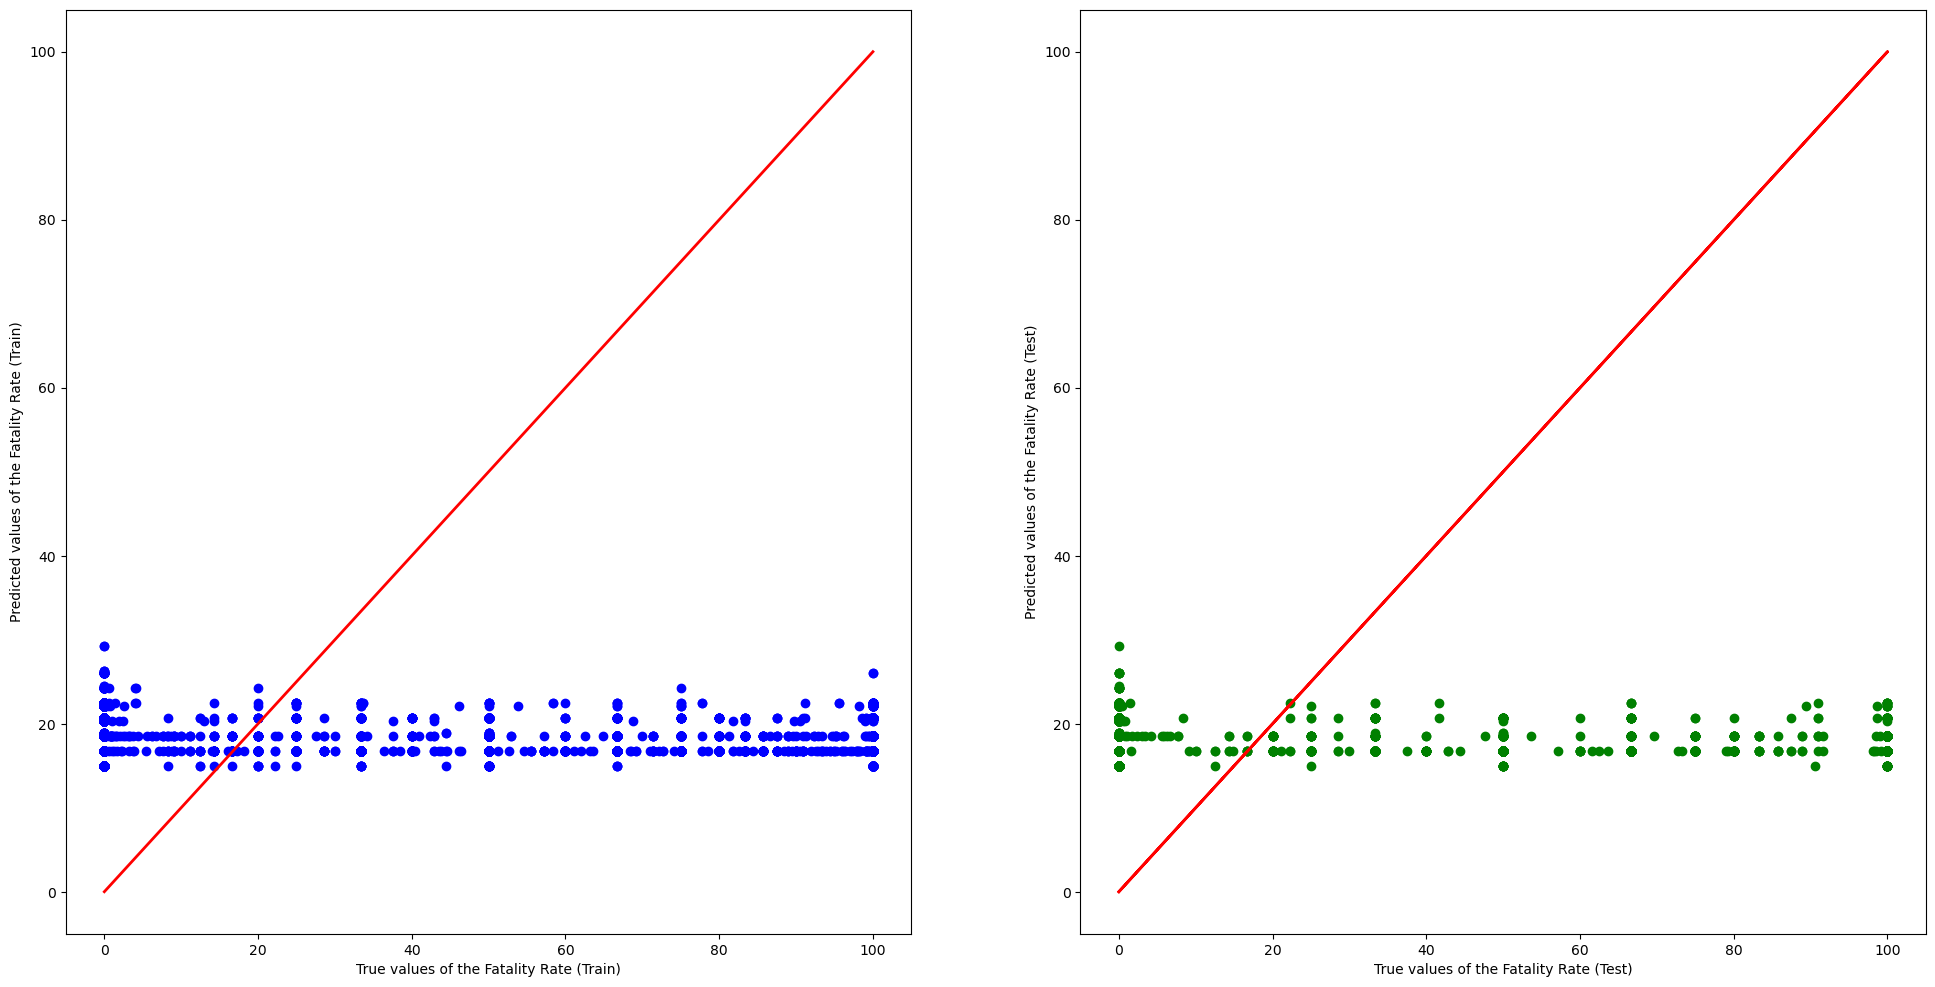

In [9]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train["Fatal.rate"], y_train_pred, color = "blue")
axes[0].plot(y_train["Fatal.rate"], y_train["Fatal.rate"], 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Fatality Rate (Train)")
axes[0].set_ylabel("Predicted values of the Fatality Rate (Train)")
axes[1].scatter(y_test["Fatal.rate"], y_test_pred, color = "green")
axes[1].plot(y_test["Fatal.rate"], y_test["Fatal.rate"], 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Fatality Rate (Test)")
axes[1].set_ylabel("Predicted values of the Fatality Rate (Test)")
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0007596128518343459
Mean Squared Error (MSE) 	: 1271.1665364485534

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0007579211358467175
Mean Squared Error (MSE) 	: 1260.971923572398



As we can see, the **explained variance** for both the train and test data sets are extremely low, while the **mean squared error** for both are extremely high. This is not ideal, the model is very inaccurate and will not be a good estimator at all.

***

We will try using **StandardScaler** from sklearn to standardize the predictors. This is done by subtracting the mean of a predictor from each of its individual data points (essentially removing the mean), and then scaling to unit variance.

The linear regression will be reattempted with the standardized predictors.

## Multi-Variate Linear Regression (using Standard Scaler)

In [11]:
from sklearn.preprocessing import StandardScaler

avi_clean_ss = avi_clean[["Fatal.rate", "Number.of.Engines", "Number of plane involved"]]

scaler = StandardScaler()
avi_clean_ss = scaler.fit_transform(avi_clean_ss)

In [12]:
avi_clean_ss_df = pd.DataFrame(avi_clean_ss, columns = ["Fatal.rate", "Number.of.Engines", "Number of plane involved"])

After performing StandardScaler on our data, we are ready to rebuild our LinearRegression model. The steps are exactly the same as what we did just now.

In [13]:
y1 = pd.DataFrame(avi_clean_ss_df["Fatal.rate"])
X1 = pd.DataFrame(avi_clean_ss_df[["Number.of.Engines", "Number of plane involved"]])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2) #split the data into train:test=8:2

In [14]:
linreg1 = LinearRegression()
linreg1.fit(X1_train, y1_train)

print('Intercept of Regression \t: b = ', linreg1.intercept_)
print('Coefficients of Regression \t: a = ', linreg1.coef_)
print()

Intercept of Regression 	: b =  [0.00229502]
Coefficients of Regression 	: a =  [[0.02189937 0.01492358]]



In [15]:
print(pd.DataFrame(list(zip(X1_train.columns, linreg1.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

                 Predictors  Coefficients
0         Number.of.Engines      0.021899
1  Number of plane involved      0.014924



In [16]:
y1_train_pred = linreg1.predict(X1_train)
y1_test_pred = linreg1.predict(X1_test)

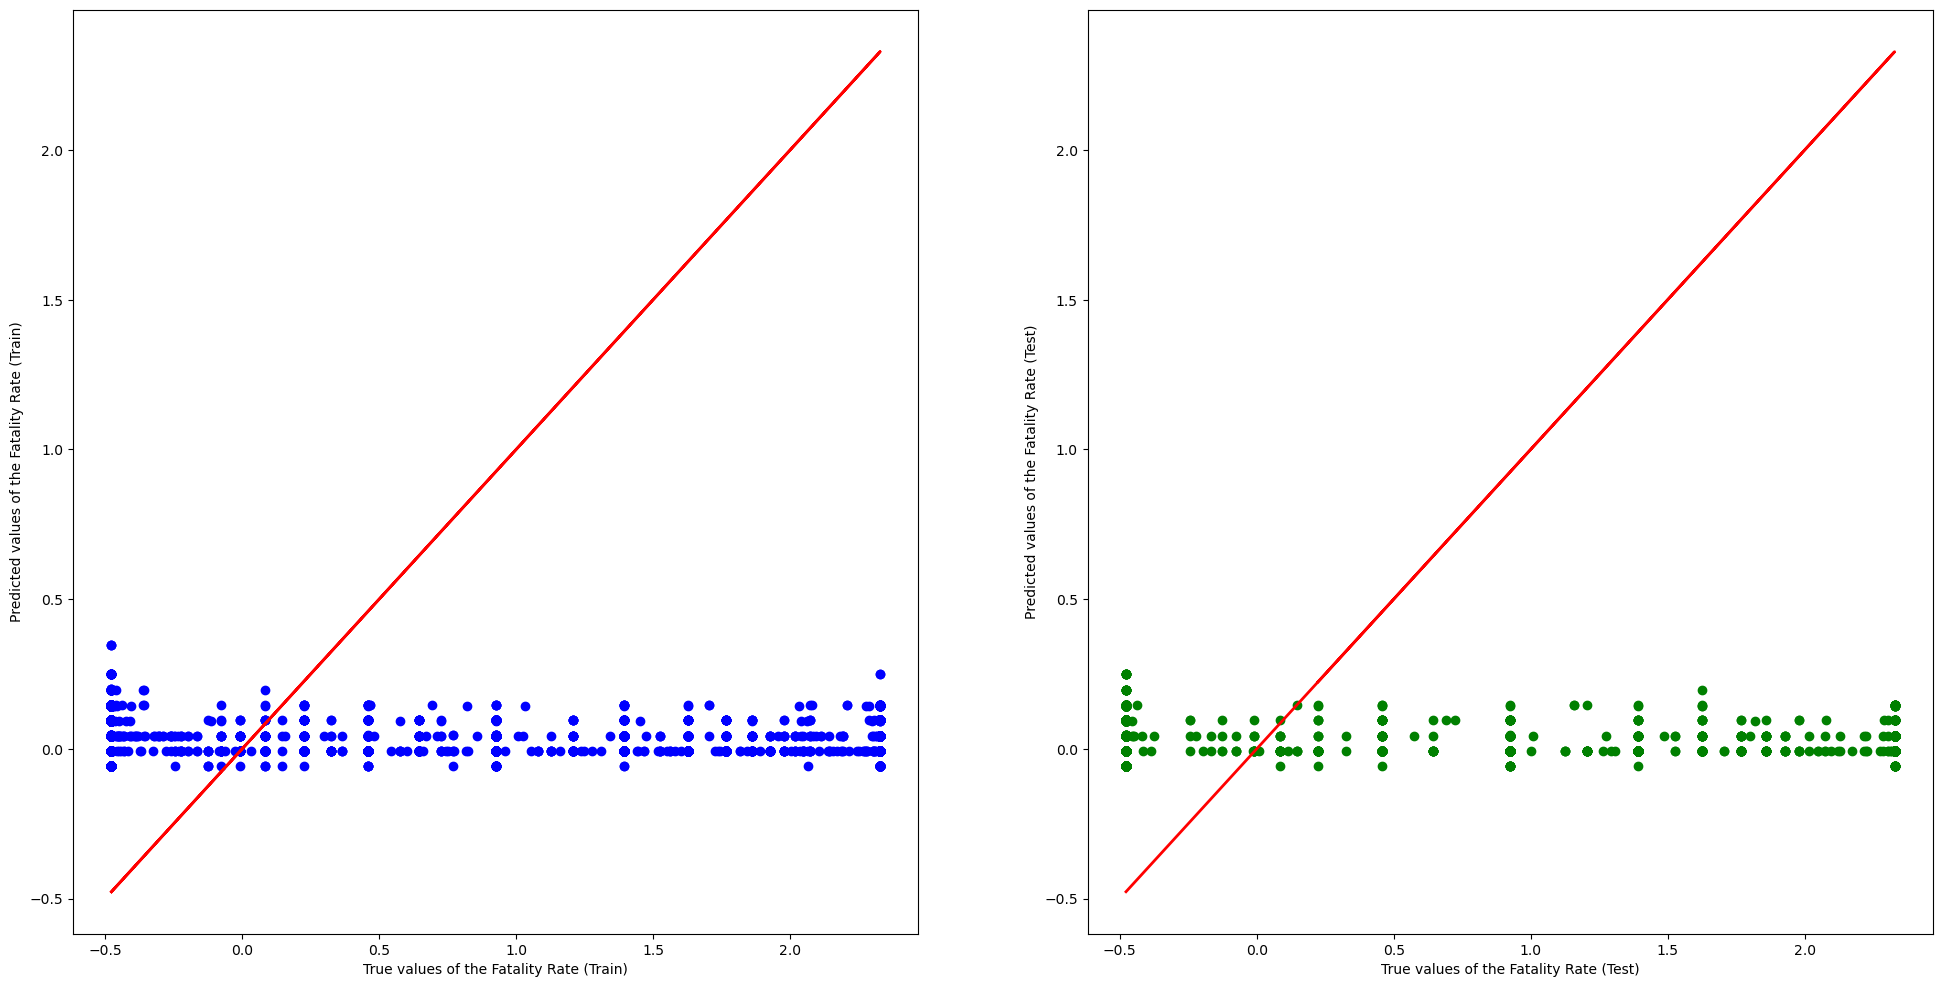

In [17]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y1_train["Fatal.rate"], y1_train_pred, color = "blue")
axes[0].plot(y1_train["Fatal.rate"], y1_train["Fatal.rate"], 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Fatality Rate (Train)")
axes[0].set_ylabel("Predicted values of the Fatality Rate (Train)")
axes[1].scatter(y1_test["Fatal.rate"], y1_test_pred, color = "green")
axes[1].plot(y1_test["Fatal.rate"], y1_test["Fatal.rate"], 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Fatality Rate (Test)")
axes[1].set_ylabel("Predicted values of the Fatality Rate (Test)")
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X1_train, y1_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_train, y1_train_pred))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg1.score(X1_test, y1_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y1_test, y1_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0007320931863353808
Mean Squared Error (MSE) 	: 1.0032275226217324

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0007676164122838447
Mean Squared Error (MSE) 	: 0.9832914445085491



As we can see, the **explained variance** of both data sets are still extremely low.\
The **mean squared error** has been reduced to about 1, however, this is expected as StandardScaler ***subtracts the mean from each data point.*** 

It is found that LinearRegression is not ideal at all for predicting our numeric response variable ("Fatal.rate"), as there is little to no correlation with the numerical predictors "Number.of.Engines" and "Number of planes involved" as shown by the goodness of fit.

Therefore, we will now focus only on **classification** by using `Injury.Severity` as our responding variables. 